In [1]:
import torch
import torch.nn as nn

from hvsrUNet.module.model import UNet
from hvsrUNet.module.trainer import train
from hvsrUNet.module.dataset import MkData
from hvsrUNet.toolbox.plot import plotTest, plotLoss
from hvsrUNet.toolbox.hvsrIO import saveModel, loadModel

dataset = MkData()
train_iter, test_iter = dataset.getIter()

# define model
model = nn.Sequential(
    UNet(1, 1)
    )

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


In [ ]:
# train 
epochs = 5
model, losses = train(model, criterion, optimizer, train_iter, num_epochs=epochs)

In [ ]:
saveModel(model, optimizer, epochs, losses, '../data/4_8_2_20_20_5.pt')

In [2]:
model, optimizer, epochs, losses = loadModel(model, optimizer, '../data/4_8_2_20_20_5.pt')

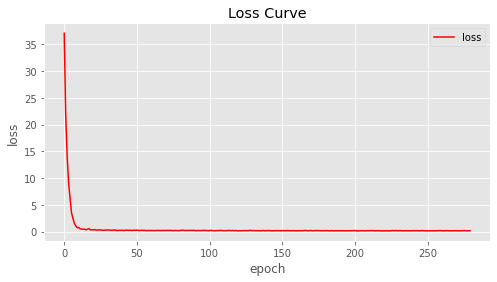

In [3]:
plotLoss(losses)

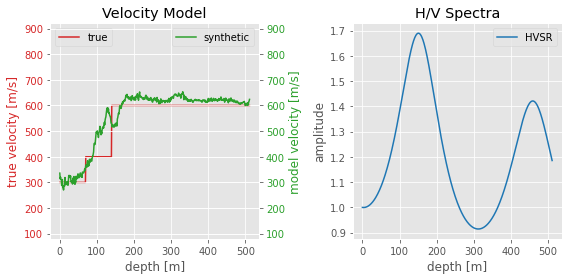

In [4]:
plotTest(model, test_iter)

In [ ]:
plotTest(model, train_iter)